In [1]:
import pandas as pd

# Load datasets
vacant_df = pd.read_csv("Data/cleanedvacant2.csv")  # Adjust file names if necessary
crime_df = pd.read_csv("Data/Cleaned_crime_report.csv")


In [ ]:
# Inspect structure
print(vacant_df["Neighborhood"])
print(crime_df["Neighborhood"])



0        Carrollton Ridge
1        Carrollton Ridge
2        Carrollton Ridge
3        Carrollton Ridge
4        Carrollton Ridge
               ...       
13180          Waltherson
13181             Arcadia
13182        Morrell Park
13183             Tremont
13184      Reservoir Hill
Name: Neighborhood, Length: 13185, dtype: object
0            Sandtown-Winchester
1            Sandtown-Winchester
2            Sandtown-Winchester
3            Sandtown-Winchester
4               Carrollton Ridge
                   ...          
219582               Park Circle
219583    Lower Herring Run Park
219584         Edmondson Village
219585        South Clifton Park
219586                     Upton
Name: Neighborhood, Length: 219587, dtype: object


In [9]:
vacant_df["date"] = pd.to_datetime(vacant_df["DateNotice"])
crime_df["date"] = pd.to_datetime(crime_df["ArrestDateTime"])

print(vacant_df)
print(crime_df)

                  X              Y  OBJECTID NoticeNum  DateNotice  \
0      1.411571e+06  588061.848078         7  2215068A        2023   
1      1.411596e+06  588072.437296         9   602095A        2010   
2      1.411646e+06  588094.649522        13   333350A        2008   
3      1.412037e+06  588256.568817        14  2188893A        2022   
4      1.412023e+06  588250.141337        15  2344541A        2024   
...             ...            ...       ...       ...         ...   
13180  1.437047e+06  609864.174552    245998  1510507A        2017   
13181  1.434197e+06  606843.727509    246063  2320172A        2023   
13182  1.407788e+06  581914.558207    246799  2090624A        2022   
13183  1.398517e+06  588821.179893    246997  1904620A        2023   
13184  1.415092e+06  598945.299736    963903  2311755A        2023   

       DateCancel  DateAbate      NT OWNER_ABBR HousingMarketTypology2023  \
0             NaN        NaN  Vacant        NaN                         J   
1    

In [14]:
# Merge on neighborhood and date (adjust as needed)
merged_df = pd.merge(crime_df, vacant_df, on=["Neighborhood", "date"], how="inner")

merged_df

,Unnamed: 0,X_x,Y_x,RowID,IncidentNumber,ArrestNumber,Age,Gender,Race,ArrestDateTime,...,NoticeNum,DateNotice,DateCancel,DateAbate,NT,OWNER_ABBR,HousingMarketTypology2023,Council_District,BLOCKLOT,Address
0,0,1.413638e+06,597194.151583,1,23L09552,23192623.0,16.0,M,B,2023,...,2224860A,2023,NaN,NaN,Vacant,NaN,J,7,0016 015,1628 N GILMOR ST
1,0,1.413638e+06,597194.151583,1,23L09552,23192623.0,16.0,M,B,2023,...,2331803A,2023,NaN,NaN,Vacant,NaN,J,9,0055C013,1125 N CAREY ST
2,0,1.413638e+06,597194.151583,1,23L09552,23192623.0,16.0,M,B,2023,...,2321441A,2023,NaN,NaN,Vacant,NaN,J,9,0055C014,1127 N CAREY ST
3,0,1.413638e+06,597194.151583,1,23L09552,23192623.0,16.0,M,B,2023,...,2225501A,2023,NaN,NaN,Vacant,NaN,I,7,0022 009,1516 N GILMOR ST
4,0,1.413638e+06,597194.151583,1,23L09552,23192623.0,16.0,M,B,2023,...,2252257A,2023,NaN,NaN,Vacant,NaN,J,7,0008 001,1700 N FULTON AVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387922,379848,1.408062e+06,605113.277780,379849,10A00005,10000039.0,17.0,M,B,2010,...,590316A,2010,NaN,NaN,Vacant,NaN,I,6,3165 019,2901 SPRINGHILL AVE
1387923,379848,1.408062e+06,605113.277780,379849,10A00005,10000039.0,17.0,M,B,2010,...,647743A,2010,NaN,NaN,Vacant,NaN,I,6,3322 036,3819 REISTERSTOWN ROAD
1387924,379852,1.416216e+06,596366.646274,379853,10A00069,10000083.0,21.0,M,B,2010,...,531518A,2010,NaN,NaN,Vacant,NaN,H,11,0431 076,1103 MYRTLE AVE
1387925,379852,1.416216e+06,596366.646274,379853,10A00069,10000083.0,21.0,M,B,2010,...,649474A,2010,NaN,NaN,Vacant,NaN,I,11,0327 002,1802 DIVISION ST


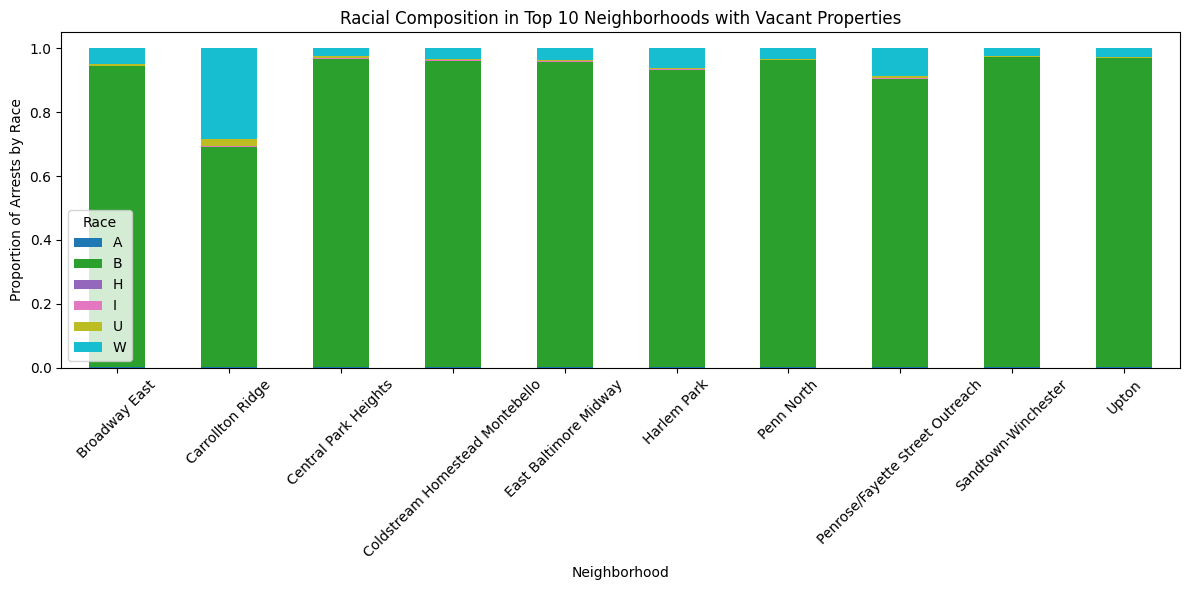

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Count vacant properties per neighborhood
top_vacant_neighborhoods = merged_df["Neighborhood"].value_counts().nlargest(10).index

# Step 2: Filter for top 10 neighborhoods
filtered_df = merged_df[merged_df["Neighborhood"].isin(top_vacant_neighborhoods)]

# Step 3: Count races per neighborhood
race_counts = filtered_df.groupby("Neighborhood")["Race"].value_counts().unstack(fill_value=0)

# Step 4: Normalize to proportions
race_props = race_counts.div(race_counts.sum(axis=1), axis=0)

# Step 5: Plot
race_props.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab10")

plt.title("Racial Composition of the Arrests Made in Top 10 Neighborhoods with Vacant Properties")
plt.xlabel("Neighborhood")
plt.ylabel("Proportion of Arrests by Race")
plt.legend(title="Race")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [ ]:
merged_df.to_csv("Data/", index=False)
